In [1]:
import ants
import nilearn
from nilearn import image
import os
import shutil
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
from nipype.interfaces.ants import ApplyTransforms
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [13]:
#resample mni hotspots to be the same dimensions
vim_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_lh.nii.gz')
vim_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_rh.nii.gz')

till_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/dembek_drtt_lh.nii.gz')
till_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/dembek_drtt_rh.nii.gz')
hypo_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/neudorfer_hypointensity_lh.nii.gz')
hypo_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/neudorfer_hypointensity_rh.nii.gz')
conj_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/neudorfer_nowacki_conjunction_lh.nii.gz')
conj_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/neudorfer_nowacki_conjunction_rh.nii.gz')
now_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/nowacki_significance_map_lh.nii.gz')
now_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/nowacki_significance_map_rh.nii.gz')
n39_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/tremor_vim_n39_hotspot_lh.nii.gz')
n39_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/tremor_vim_n39_hotspot_rh.nii.gz')
vldvlv_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/VLdVLv_ilinsky_lh.nii.gz')
vldvlv_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/VLdVLv_ilinsky_rh.nii.gz')
vlpv_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/VLpv_morel_lh.nii.gz')
vlpv_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/VLpv_morel_rh.nii.gz')

def resample(roi,vim,path):
    re_sub = resample_to_img(roi,vim,interpolation='nearest')
    nib.save(re_sub,path)
    
resample(till_lh,vim_lh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/dembek_drtt_lh.nii.gz')
resample(till_lh,vim_rh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/dembek_drtt_rh.nii.gz')

resample(hypo_lh,vim_lh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_hypointensity_lh.nii.gz')
resample(hypo_rh,vim_rh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_hypointensity_rh.nii.gz')

resample(conj_lh,vim_lh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_nowacki_conjunction_lh.nii.gz')
resample(conj_rh,vim_rh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_nowacki_conjunction_rh.nii.gz')

resample(now_lh,vim_lh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/nowacki_significance_map_lh.nii.gz')
resample(now_rh,vim_rh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/nowacki_significance_map_rh.nii.gz')

resample(n39_lh,vim_lh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/tremor_vim_n39_hotspot_lh.nii.gz')
resample(n39_rh,vim_rh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/tremor_vim_n39_hotspot_rh.nii.gz')

resample(vldvlv_lh,vim_lh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLdVLv_ilinsky_lh.nii.gz')
resample(vldvlv_rh,vim_rh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLdVLv_ilinsky_rh.nii.gz')

resample(vlpv_lh,vim_lh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLpv_morel_lh.nii.gz')
resample(vlpv_rh,vim_rh,'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLpv_morel_rh.nii.gz')

In [39]:
#converting MNI ROIs to each patient's native space- does not like special characters in paths, like &!!!!
def mni2native(i,hotspot):
    print(f'converting to native for {i} in hotspot {hotspot}')
    at = ApplyTransforms()
    at.inputs.dimension = 3
    at.inputs.input_image = f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/{hotspot}.nii.gz'
    
    base_path = f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Data/derivatives/leaddbs/{i}/coregistration/anat/{i}_ses-preop_space-anchorNative_desc-preproc_acq-'
    possible_files = ['ax_T1w.nii', 'cor_T1w.nii', 'iso_T1w.nii', 'ax_T2w.nii', 'iso_T2w.nii', 'sag_T1w.nii']
    
    reference_image = None
    for file_suffix in possible_files:
        ref_image_path = f'{base_path}{file_suffix}'
        if os.path.exists(ref_image_path):
            reference_image = ref_image_path
            break
        
    at.inputs.reference_image = reference_image
    at.inputs.transforms = f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Data/derivatives/leaddbs/{i}/normalization/transformations/{i}_from-MNI152NLin2009bAsym_to-anchorNative_desc-ants.nii.gz'
    at.inputs.output_image = f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_{hotspot}_native_output.nii'
    at.inputs.invert_transform_flags = [False]
    at.run()
    
directory = [i for i in os.listdir('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip') if i.startswith('sub')]
hotspots = ['neudorfer_hypointensity_lh','neudorfer_hypointensity_rh','neudorfer_nowacki_conjunction_lh','neudorfer_nowacki_conjunction_rh','nowacki_significance_map_lh','nowacki_significance_map_rh','tremor_vim_n39_hotspot_lh','tremor_vim_n39_hotspot_rh','VIM_distal_lh','VIM_distal_rh','VLdVLv_ilinsky_lh','VLdVLv_ilinsky_rh','VLpv_morel_lh','VLpv_morel_rh']

for i in directory:
    for hotspot in hotspots:
        mni2native(i,hotspot)

converting to native for sub-02ad2 in hotspot neudorfer_hypointensity_lh
converting to native for sub-02ad2 in hotspot neudorfer_hypointensity_rh
converting to native for sub-02ad2 in hotspot neudorfer_nowacki_conjunction_lh
converting to native for sub-02ad2 in hotspot neudorfer_nowacki_conjunction_rh
converting to native for sub-02ad2 in hotspot nowacki_significance_map_lh
converting to native for sub-02ad2 in hotspot nowacki_significance_map_rh
converting to native for sub-02ad2 in hotspot tremor_vim_n39_hotspot_lh
converting to native for sub-02ad2 in hotspot tremor_vim_n39_hotspot_rh
converting to native for sub-02ad2 in hotspot VIM_distal_lh
converting to native for sub-02ad2 in hotspot VIM_distal_rh
converting to native for sub-02ad2 in hotspot VLdVLv_ilinsky_lh
converting to native for sub-02ad2 in hotspot VLdVLv_ilinsky_rh
converting to native for sub-02ad2 in hotspot VLpv_morel_lh
converting to native for sub-02ad2 in hotspot VLpv_morel_rh
converting to native for sub-0f0bf i

converting to native for sub-265bd in hotspot tremor_vim_n39_hotspot_rh
converting to native for sub-265bd in hotspot VIM_distal_lh
converting to native for sub-265bd in hotspot VIM_distal_rh
converting to native for sub-265bd in hotspot VLdVLv_ilinsky_lh
converting to native for sub-265bd in hotspot VLdVLv_ilinsky_rh
converting to native for sub-265bd in hotspot VLpv_morel_lh
converting to native for sub-265bd in hotspot VLpv_morel_rh
converting to native for sub-30ed8 in hotspot neudorfer_hypointensity_lh
converting to native for sub-30ed8 in hotspot neudorfer_hypointensity_rh
converting to native for sub-30ed8 in hotspot neudorfer_nowacki_conjunction_lh
converting to native for sub-30ed8 in hotspot neudorfer_nowacki_conjunction_rh
converting to native for sub-30ed8 in hotspot nowacki_significance_map_lh
converting to native for sub-30ed8 in hotspot nowacki_significance_map_rh
converting to native for sub-30ed8 in hotspot tremor_vim_n39_hotspot_lh
converting to native for sub-30ed8 i

converting to native for sub-5dc03 in hotspot neudorfer_hypointensity_rh
converting to native for sub-5dc03 in hotspot neudorfer_nowacki_conjunction_lh
converting to native for sub-5dc03 in hotspot neudorfer_nowacki_conjunction_rh
converting to native for sub-5dc03 in hotspot nowacki_significance_map_lh
converting to native for sub-5dc03 in hotspot nowacki_significance_map_rh
converting to native for sub-5dc03 in hotspot tremor_vim_n39_hotspot_lh
converting to native for sub-5dc03 in hotspot tremor_vim_n39_hotspot_rh
converting to native for sub-5dc03 in hotspot VIM_distal_lh
converting to native for sub-5dc03 in hotspot VIM_distal_rh
converting to native for sub-5dc03 in hotspot VLdVLv_ilinsky_lh
converting to native for sub-5dc03 in hotspot VLdVLv_ilinsky_rh
converting to native for sub-5dc03 in hotspot VLpv_morel_lh
converting to native for sub-5dc03 in hotspot VLpv_morel_rh
converting to native for sub-6b300 in hotspot neudorfer_hypointensity_lh
converting to native for sub-6b300 i

converting to native for sub-93d72 in hotspot VIM_distal_lh
converting to native for sub-93d72 in hotspot VIM_distal_rh
converting to native for sub-93d72 in hotspot VLdVLv_ilinsky_lh
converting to native for sub-93d72 in hotspot VLdVLv_ilinsky_rh
converting to native for sub-93d72 in hotspot VLpv_morel_lh
converting to native for sub-93d72 in hotspot VLpv_morel_rh
converting to native for sub-a6331 in hotspot neudorfer_hypointensity_lh
converting to native for sub-a6331 in hotspot neudorfer_hypointensity_rh
converting to native for sub-a6331 in hotspot neudorfer_nowacki_conjunction_lh
converting to native for sub-a6331 in hotspot neudorfer_nowacki_conjunction_rh
converting to native for sub-a6331 in hotspot nowacki_significance_map_lh
converting to native for sub-a6331 in hotspot nowacki_significance_map_rh
converting to native for sub-a6331 in hotspot tremor_vim_n39_hotspot_lh
converting to native for sub-a6331 in hotspot tremor_vim_n39_hotspot_rh
converting to native for sub-a6331 i

converting to native for sub-fea2f in hotspot neudorfer_nowacki_conjunction_lh
converting to native for sub-fea2f in hotspot neudorfer_nowacki_conjunction_rh
converting to native for sub-fea2f in hotspot nowacki_significance_map_lh
converting to native for sub-fea2f in hotspot nowacki_significance_map_rh
converting to native for sub-fea2f in hotspot tremor_vim_n39_hotspot_lh
converting to native for sub-fea2f in hotspot tremor_vim_n39_hotspot_rh
converting to native for sub-fea2f in hotspot VIM_distal_lh
converting to native for sub-fea2f in hotspot VIM_distal_rh
converting to native for sub-fea2f in hotspot VLdVLv_ilinsky_lh
converting to native for sub-fea2f in hotspot VLdVLv_ilinsky_rh
converting to native for sub-fea2f in hotspot VLpv_morel_lh
converting to native for sub-fea2f in hotspot VLpv_morel_rh


In [23]:
#load, check for voxel dimensions, resample
directory = [i for i in os.listdir('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip') if i.startswith('sub')]

vim_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_lh.nii.gz')
vim_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_rh.nii.gz')

#get voxel dimensions
def dim(path):
    nii = nib.load(path)
    header = nii.header
    voxel_dims = header.get_zooms()
    return voxel_dims

#resample and binarize patients
def resample_binarize(sub,vim,path):
    re_sub = resample_to_img(sub,vim,interpolation='nearest')
    re_binarized_sub = math_img('img > 0.1', img=re_sub)
    nib.save(re_binarized_sub,path)

for i in directory:
    print(i)
    #load in native vims for resampling anchor
    vim_native_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VIM_distal_lh_native_output.nii')
    vim_native_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VIM_distal_rh_native_output.nii')
   
    #load in patients
    native_lh_sub = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/native/{i}_sim-binary_model-simbio_hemi-L.nii')
    native_rh_sub = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/native/{i}_sim-binary_model-simbio_hemi-R.nii')
    mni_lh_sub = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/MNI152NLin2009bAsym/{i}_sim-binary_model-simbio_hemi-L.nii')
    mni_rh_sub = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/MNI152NLin2009bAsym/{i}_sim-binary_model-simbio_hemi-R.nii')

    native_lh_vox = dim(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/native/{i}_sim-binary_model-simbio_hemi-L.nii')
    native_rh_vox = dim(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/native/{i}_sim-binary_model-simbio_hemi-R.nii')
    vim_native_lh_vox = dim(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VIM_distal_lh_native_output.nii')
    vim_native_rh_vox = dim(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VIM_distal_rh_native_output.nii')
    mni_lh_vox = dim(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/MNI152NLin2009bAsym/{i}_sim-binary_model-simbio_hemi-L.nii')
    mni_rh_vox = dim(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/stimulations/MNI152NLin2009bAsym/{i}_sim-binary_model-simbio_hemi-R.nii')
    vim_mni_lh_vox = dim('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_lh.nii.gz')
    vim_mni_rh_vox = dim('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_rh.nii.gz')
    
    if native_lh_vox == vim_native_lh_vox:
        print(f'{i} native left hemisphere voxel dimensions are the same')
    else:
        resample_binarize(native_lh_sub,vim_native_lh,f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_native_sim-binary_model-simbio_hemi-L.nii')
        
    if mni_lh_vox == vim_mni_lh_vox:
        print(f'{i} MNI left hemisphere voxel dimensions are the same')
    else:
        resample_binarize(mni_lh_sub,vim_lh,f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-L.nii')

    if native_rh_vox == vim_native_rh_vox:
        print(f'{i} native right hemisphere voxel dimensions are the same')
    else:
        resample_binarize(native_rh_sub,vim_native_rh,f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_native_sim-binary_model-simbio_hemi-R.nii')
        
    if mni_rh_vox == vim_mni_rh_vox:
        print(f'{i} MNI right hemisphere voxel dimensions are the same')
    else:
        resample_binarize(mni_rh_sub,vim_rh,f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-R.nii')

sub-02ad2
sub-0f0bf
sub-10ae5
sub-13e41
sub-1765d
sub-17912
sub-18e53
sub-1e506
sub-265bd
sub-30ed8
sub-3413f
sub-3c3ce
sub-49330
sub-4abbd
sub-544b6
sub-54b20
sub-59e15
sub-5dc03
sub-6b300
sub-6de35
sub-75381
sub-7b040
sub-7b793
sub-7ffd2
sub-8bc8e
sub-93d72
sub-a6331
sub-c01f1
sub-c2678
sub-c2a75
sub-c6f65
sub-cbd02
sub-d170a
sub-d9e29
sub-fea2f


In [24]:
#get volumes of overlap

#make lists to store outputs in
native_vim_lh,native_vim_rh,mni_vim_lh,mni_vim_rh,native_till_lh,native_till_rh,mni_till_lh,mni_till_rh = [],[],[],[],[],[],[],[]
native_hypo_lh,native_hypo_rh,mni_hypo_lh,mni_hypo_rh,native_conj_lh,native_conj_rh,mni_conj_lh,mni_conj_rh = [],[],[],[],[],[],[],[]
native_sig_lh,native_sig_rh,mni_sig_lh,mni_sig_rh,native_n39_lh,native_n39_rh,mni_n39_lh,mni_n39_rh = [],[],[],[],[],[],[],[]
native_vldvlv_lh,native_vldvlv_rh,mni_vldvlv_lh,mni_vldvlv_rh,native_vlpv_lh,native_vlpv_rh,mni_vlpv_lh,mni_vlpv_rh = [],[],[],[],[],[],[],[]

#load in mni hotspots
vim_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_lh.nii.gz')
vim_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VIM_distal_rh.nii.gz')
till_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/dembek_drtt_lh.nii.gz')
till_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/dembek_drtt_rh.nii.gz')
hypo_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_hypointensity_lh.nii.gz')
hypo_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_hypointensity_rh.nii.gz')
conj_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_nowacki_conjunction_lh.nii.gz')
conj_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/neudorfer_nowacki_conjunction_rh.nii.gz')
sig_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/nowacki_significance_map_lh.nii.gz')
sig_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/nowacki_significance_map_rh.nii.gz')
n39_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/tremor_vim_n39_hotspot_lh.nii.gz')
n39_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/tremor_vim_n39_hotspot_rh.nii.gz')
vldvlv_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLdVLv_ilinsky_lh.nii.gz')
vldvlv_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLdVLv_ilinsky_rh.nii.gz')
vlpv_lh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLpv_morel_lh.nii.gz')
vlpv_rh = load_img('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/HotspotsAtlas/resampled/VLpv_morel_rh.nii.gz')
    
def get_binary_overlap(roi,sub,volume_list):
    mask = math_img('img1*img2',img1=roi,img2=sub)
    mask = mask.get_fdata()
    volume = np.sum(mask)
    volume_list.append(volume)

#loop over to get volume
for i in directory:
    print(i)
    #load in all subjects and native hotspots
    sub_native_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_native_sim-binary_model-simbio_hemi-L.nii')
    sub_mni_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-L.nii')
    sub_native_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_native_sim-binary_model-simbio_hemi-R.nii')
    sub_mni_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-R.nii')

    vim_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VIM_distal_lh_native_output.nii')
    till_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_dembek_drtt_lh_native_output.nii')
    hypo_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_neudorfer_hypointensity_lh_native_output.nii')
    conj_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_neudorfer_nowacki_conjunction_lh_native_output.nii')
    sig_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_nowacki_significance_map_lh_native_output.nii')
    n39_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_tremor_vim_n39_hotspot_lh_native_output.nii')
    vldvlv_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VLdVLv_ilinsky_lh_native_output.nii')
    vlpv_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VLpv_morel_lh_native_output.nii') 
    vim_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VIM_distal_rh_native_output.nii')
    till_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_dembek_drtt_rh_native_output.nii')
    hypo_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_neudorfer_hypointensity_rh_native_output.nii')
    conj_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_neudorfer_nowacki_conjunction_rh_native_output.nii')
    sig_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_nowacki_significance_map_rh_native_output.nii')
    n39_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_tremor_vim_n39_hotspot_rh_native_output.nii')
    vldvlv_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VLdVLv_ilinsky_rh_native_output.nii')
    vlpv_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/FieldTrip/{i}/{i}_VLpv_morel_rh_native_output.nii')

    #call the function
    get_binary_overlap(vim_nativespace_lh,sub_native_lh,native_vim_lh)
    get_binary_overlap(vim_lh,sub_mni_lh,mni_vim_lh)
    get_binary_overlap(till_nativespace_lh,sub_native_lh,native_till_lh)
    get_binary_overlap(till_lh,sub_mni_lh,mni_till_lh)
    get_binary_overlap(hypo_nativespace_lh,sub_native_lh,native_hypo_lh)
    get_binary_overlap(hypo_lh,sub_mni_lh,mni_hypo_lh)
    get_binary_overlap(conj_nativespace_lh,sub_native_lh,native_conj_lh)
    get_binary_overlap(conj_lh,sub_mni_lh,mni_conj_lh)
    get_binary_overlap(sig_nativespace_lh,sub_native_lh,native_sig_lh)
    get_binary_overlap(sig_lh,sub_mni_lh,mni_sig_lh)
    get_binary_overlap(n39_nativespace_lh,sub_native_lh,native_n39_lh)
    get_binary_overlap(n39_lh,sub_mni_lh,mni_n39_lh)
    get_binary_overlap(vldvlv_nativespace_lh,sub_native_lh,native_vldvlv_lh)
    get_binary_overlap(vldvlv_lh,sub_mni_lh,mni_vldvlv_lh)
    get_binary_overlap(vlpv_nativespace_lh,sub_native_lh,native_vlpv_lh)
    get_binary_overlap(vlpv_lh,sub_mni_lh,mni_vlpv_lh)
    get_binary_overlap(vim_nativespace_rh,sub_native_rh,native_vim_rh)
    get_binary_overlap(vim_rh,sub_mni_rh,mni_vim_rh)
    get_binary_overlap(till_nativespace_rh,sub_native_rh,native_till_rh)
    get_binary_overlap(till_rh,sub_mni_rh,mni_till_rh)
    get_binary_overlap(hypo_nativespace_rh,sub_native_rh,native_hypo_rh)
    get_binary_overlap(hypo_rh,sub_mni_rh,mni_hypo_rh)
    get_binary_overlap(conj_nativespace_rh,sub_native_rh,native_conj_rh)
    get_binary_overlap(conj_rh,sub_mni_rh,mni_conj_rh)
    get_binary_overlap(sig_nativespace_rh,sub_native_rh,native_sig_rh)
    get_binary_overlap(sig_rh,sub_mni_rh,mni_sig_rh)
    get_binary_overlap(n39_nativespace_rh,sub_native_rh,native_n39_rh)
    get_binary_overlap(n39_rh,sub_mni_rh,mni_n39_rh)
    get_binary_overlap(vldvlv_nativespace_rh,sub_native_rh,native_vldvlv_rh)
    get_binary_overlap(vldvlv_rh,sub_mni_rh,mni_vldvlv_rh)
    get_binary_overlap(vlpv_nativespace_rh,sub_native_rh,native_vlpv_rh)
    get_binary_overlap(vlpv_rh,sub_mni_rh,mni_vlpv_rh)

sub-02ad2
sub-0f0bf
sub-10ae5
sub-13e41
sub-1765d
sub-17912
sub-18e53
sub-1e506
sub-265bd
sub-30ed8
sub-3413f
sub-3c3ce
sub-49330
sub-4abbd
sub-544b6
sub-54b20
sub-59e15
sub-5dc03
sub-6b300
sub-6de35
sub-75381
sub-7b040
sub-7b793
sub-7ffd2
sub-8bc8e
sub-93d72
sub-a6331
sub-c01f1
sub-c2678
sub-c2a75
sub-c6f65
sub-cbd02
sub-d170a
sub-d9e29
sub-fea2f


In [25]:
#get bilateral values for each column, taking the average
native_vim_bi,native_till_bi,native_hypo_bi,native_conj_bi,native_sig_bi,native_n39_bi,native_vldvlv_bi,native_vlpv_bi = [],[],[],[],[],[],[],[]
mni_vim_bi,mni_till_bi,mni_hypo_bi,mni_conj_bi,mni_sig_bi,mni_n39_bi,mni_vldvlv_bi,mni_vlpv_bi = [],[],[],[],[],[],[],[]
    
def binary_bilateral(list1,list2,sums_list):
    sums = [(x + y) for x, y in zip(list1, list2)]
    sums_list.extend(sums)

binary_bilateral(native_vim_lh,native_vim_rh,native_vim_bi)
binary_bilateral(mni_vim_lh,mni_vim_rh,mni_vim_bi)
binary_bilateral(native_till_lh,native_till_rh,native_till_bi)
binary_bilateral(mni_till_lh,mni_till_rh,mni_till_bi)
binary_bilateral(native_hypo_lh,native_hypo_rh,native_hypo_bi)
binary_bilateral(mni_hypo_lh,mni_hypo_rh,mni_hypo_bi)
binary_bilateral(native_conj_lh,native_conj_rh,native_conj_bi)
binary_bilateral(mni_conj_lh,mni_conj_rh,mni_conj_bi)
binary_bilateral(native_sig_lh,native_sig_rh,native_sig_bi)
binary_bilateral(mni_sig_lh,mni_sig_rh,mni_sig_bi)
binary_bilateral(native_n39_lh,native_n39_rh,native_n39_bi)
binary_bilateral(mni_n39_lh,mni_n39_rh,mni_n39_bi)
binary_bilateral(native_vldvlv_lh,native_vldvlv_rh,native_vldvlv_bi)
binary_bilateral(mni_vldvlv_lh,mni_vldvlv_rh,mni_vldvlv_bi)
binary_bilateral(native_vlpv_lh,native_vlpv_rh,native_vlpv_bi)
binary_bilateral(mni_vlpv_lh,mni_vlpv_rh,mni_vlpv_bi)

In [26]:
#convert voxels into mm
mm_native_vim_bi,mm_native_till_bi,mm_native_hypo_bi,mm_native_conj_bi,mm_native_sig_bi,mm_native_n39_bi,mm_native_vldvlv_bi,mm_native_vlpv_bi = [],[],[],[],[],[],[],[]
mm_mni_vim_bi,mm_mni_till_bi,mm_mni_hypo_bi,mm_mni_conj_bi,mm_mni_sig_bi,mm_mni_n39_bi,mm_mni_vldvlv_bi,mm_mni_vlpv_bi = [],[],[],[],[],[],[],[]

def convert(bi_list,vox,mm_list):
    for n in bi_list:
        mm = n * (vox[1]*vox[1]*vox[1])
        mm_list.append(mm)
    
convert(native_vim_bi,vim_native_lh_vox,mm_native_vim_bi)
convert(native_till_bi,vim_native_lh_vox,mm_native_till_bi)
convert(native_hypo_bi,vim_native_lh_vox,mm_native_hypo_bi)
convert(native_conj_bi,vim_native_lh_vox,mm_native_conj_bi)
convert(native_sig_bi,vim_native_lh_vox,mm_native_sig_bi)
convert(native_n39_bi,vim_native_lh_vox,mm_native_n39_bi)
convert(native_vldvlv_bi,vim_native_lh_vox,mm_native_vldvlv_bi)
convert(native_vlpv_bi,vim_native_lh_vox,mm_native_vlpv_bi)

convert(mni_vim_bi,vim_mni_lh_vox,mm_mni_vim_bi)
convert(mni_till_bi,vim_mni_lh_vox,mm_mni_till_bi)
convert(mni_hypo_bi,vim_mni_lh_vox,mm_mni_hypo_bi)
convert(mni_conj_bi,vim_mni_lh_vox,mm_mni_conj_bi)
convert(mni_sig_bi,vim_mni_lh_vox,mm_mni_sig_bi)
convert(mni_n39_bi,vim_mni_lh_vox,mm_mni_n39_bi)
convert(mni_vldvlv_bi,vim_mni_lh_vox,mm_mni_vldvlv_bi)
convert(mni_vlpv_bi,vim_mni_lh_vox,mm_mni_vlpv_bi)

In [27]:
sub_ids = []
for i in directory:
    sub_ids.append(i)

In [28]:
df = pd.DataFrame(
    {'ID': sub_ids,
     'Native_VIM_Distal_LH_Volume_Overlap_Voxels': native_vim_lh,
     'Native_VIM_Distal_RH_Volume_Overlap_Voxels': native_vim_rh,
     'Native_VIM_Distal_Bi_Volume_Overlap_Voxels': native_vim_bi,
     'Native_VIM_Distal_Bi_Volume_Overlap_MM': mm_native_vim_bi,
     'MNI_VIM_Distal_LH_Volume_Overlap_Voxels': mni_vim_lh,
     'MNI_VIM_Distal_RH_Volume_Overlap_Voxels': mni_vim_rh,
     'MNI_VIM_Distal_Bi_Volume_Overlap_Voxels': mni_vim_bi,
     'MNI_VIM_Distal_Bi_Volume_Overlap_MM': mm_mni_vim_bi,
     'Native_VLdVLv_Ilinsky_LH_Volume_Overlap_Voxels': native_vldvlv_lh,
     'Native_VLdVLv_Ilinsky_RH_Volume_Overlap_Voxels': native_vldvlv_rh,
     'Native_VLdVLv_Ilinsky_Bi_Volume_Overlap_Voxels': native_vldvlv_bi,
     'Native_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM': mm_native_vldvlv_bi,
     'MNI_VLdVLv_Ilinsky_LH_Volume_Overlap_Voxels': mni_vldvlv_lh,
     'MNI_VLdVLv_Ilinsky_RH_Volume_Overlap_Voxels': mni_vldvlv_rh,
     'MNI_VLdVLv_Ilinsky_Bi_Volume_Overlap_Voxels': mni_vldvlv_bi,
     'MNI_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM': mm_mni_vldvlv_bi,
     'Native_VLpv_Morel_LH_Volume_Overlap_Voxels': native_vlpv_lh,
     'Native_VLpv_Morel_RH_Volume_Overlap_Voxels': native_vlpv_rh,
     'Native_VLpv_Morel_Bi_Volume_Overlap_Voxels': native_vlpv_bi,
     'Native_VLpv_Morel_Bi_Volume_Overlap_MM': mm_native_vlpv_bi,
     'MNI_VLpv_Morel_LH_Volume_Overlap_Voxels': mni_vlpv_lh,
     'MNI_VLpv_Morel_RH_Volume_Overlap_Voxels': mni_vlpv_rh,
     'MNI_VLpv_Morel_Bi_Volume_Overlap_Voxels': mni_vlpv_bi,
     'MNI_VLpv_Morel_Bi_Volume_Overlap_MM': mm_mni_vlpv_bi,
     'Native_Dembek_DRTT_Hotspot_LH_Volume_Overlap_Voxels': native_till_lh,
     'Native_Dembek_DRTT_Hotspot_RH_Volume_Overlap_Voxels': native_till_rh,
     'Native_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_Voxels': native_till_bi,
     'Native_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM': mm_native_till_bi,
     'MNI_Dembek_DRTT_Hotspot_LH_Volume_Overlap_Voxels': mni_till_lh,
     'MNI_Dembek_DRTT_Hotspot_RH_Volume_Overlap_Voxels': mni_till_rh,
     'MNI_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_Voxels': mni_till_bi,
     'MNI_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM': mm_mni_till_bi,
     'Native_Neudorfer_Hypointensity_Hotspot_LH_Volume_Overlap_Voxels': native_hypo_lh,
     'Native_Neudorfer_Hypointensity_Hotspot_RH_Volume_Overlap_Voxels': native_hypo_rh,
     'Native_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_Voxels': native_hypo_bi,
     'Native_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM': mm_native_hypo_bi,
     'MNI_Neudorfer_Hypointensity_Hotspot_LH_Volume_Overlap_Voxels': mni_hypo_lh,
     'MNI_Neudorfer_Hypointensity_Hotspot_RH_Volume_Overlap_Voxels': mni_hypo_rh,
     'MNI_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_Voxels': mni_hypo_bi,
     'MNI_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM': mm_mni_hypo_bi,
     'Native_Neudorfer_Nowacki_Conjunction_Hotspot_LH_Volume_Overlap_Voxels': native_conj_lh,
     'Native_Neudorfer_Nowacki_Conjunction_Hotspot_RH_Volume_Overlap_Voxels': native_conj_rh,
     'Native_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_Voxels': native_conj_bi,
     'Native_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM': mm_native_conj_bi,
     'MNI_Neudorfer_Nowacki_Conjunction_Hotspot_LH_Volume_Overlap_Voxels': mni_conj_lh,
     'MNI_Neudorfer_Nowacki_Conjunction_Hotspot_RH_Volume_Overlap_Voxels': mni_conj_rh,
     'MNI_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_Voxels': mni_conj_bi,
     'MNI_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM': mm_mni_conj_bi,
     'Native_Nowacki_Significance_Map_LH_Volume_Overlap_Voxels': native_sig_lh,
     'Native_Nowacki_Significance_Map_RH_Volume_Overlap_Voxels': native_sig_rh,
     'Native_Nowacki_Significance_Map_Bi_Volume_Overlap_Voxels': native_sig_bi,
     'Native_Nowacki_Significance_Map_Bi_Volume_Overlap_MM': mm_native_sig_bi,
     'MNI_Nowacki_Significance_Map_LH_Volume_Overlap_Voxels': mni_sig_lh,
     'MNI_Nowacki_Significance_Map_RH_Volume_Overlap_Voxels': mni_sig_rh,
     'MNI_Nowacki_Significance_Map_Bi_Volume_Overlap_Voxels': mni_sig_bi,
     'MNI_Nowacki_Significance_Map_Bi_Volume_Overlap_MM': mm_mni_sig_bi,
     'Native_Tremor_VIM_n39_Hotspot_LH_Volume_Overlap_Voxels': native_n39_lh,
     'Native_Tremor_VIM_n39_Hotspot_RH_Volume_Overlap_Voxels': native_n39_rh,
     'Native_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_Voxels': native_n39_bi,
     'Native_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM': mm_native_n39_bi,
     'MNI_Tremor_VIM_n39_Hotspot_LH_Volume_Overlap_Voxels': mni_n39_lh,
     'MNI_Tremor_VIM_n39_Hotspot_RH_Volume_Overlap_Voxels': mni_n39_rh,
     'MNI_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_Voxels': mni_n39_bi,
     'MNI_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM': mm_mni_n39_bi
    })

df.to_csv('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Essential_Tremor_Overlap.csv')

# Plots

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


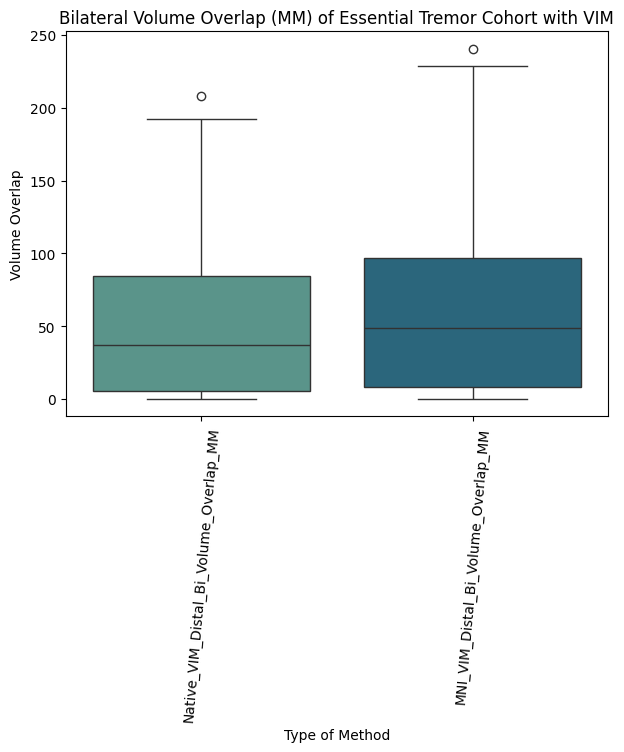

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


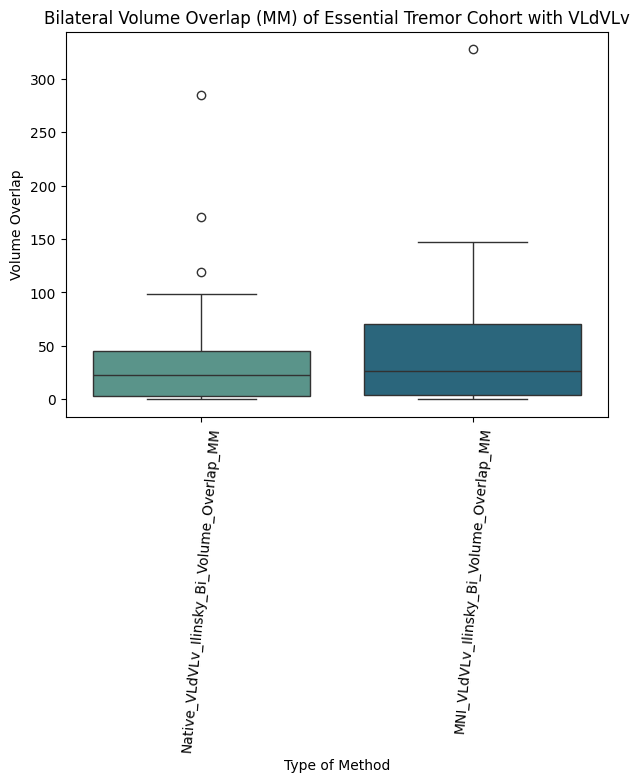

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


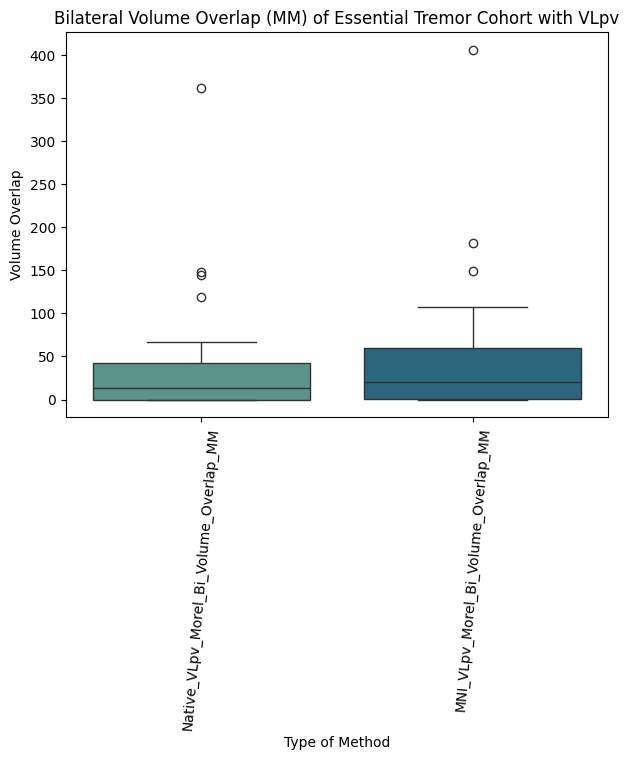

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


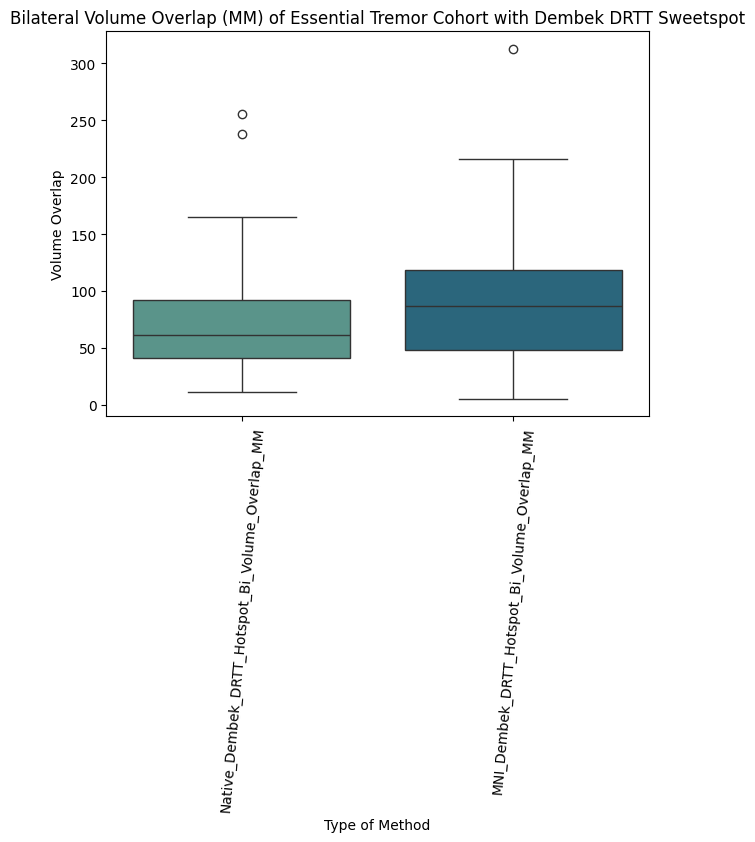

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


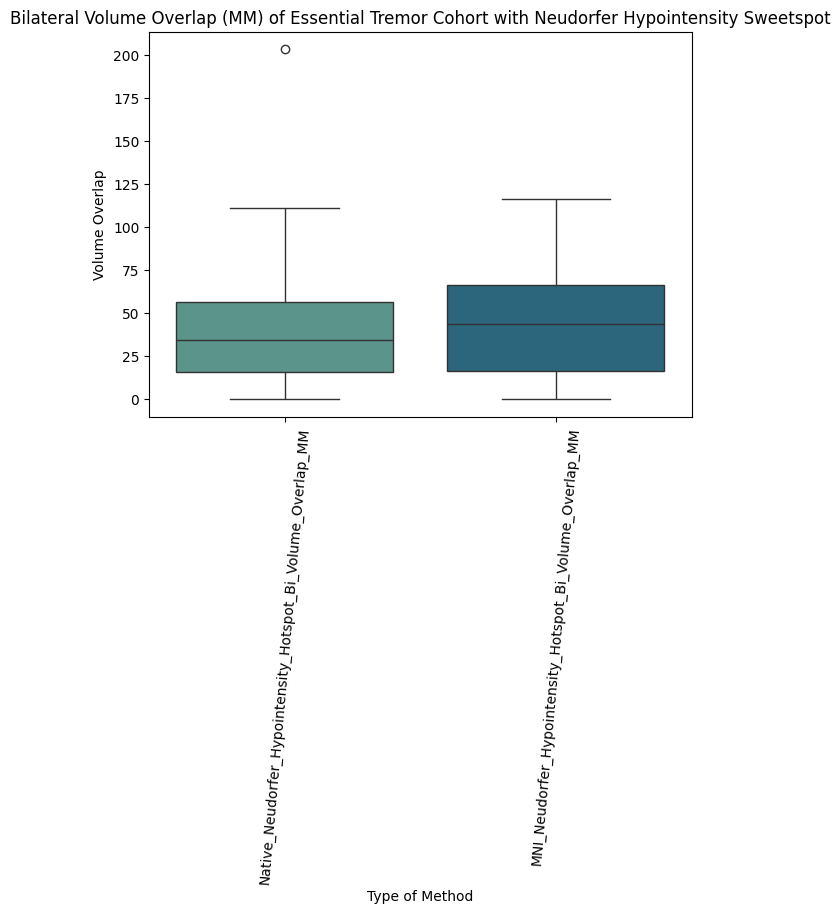

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


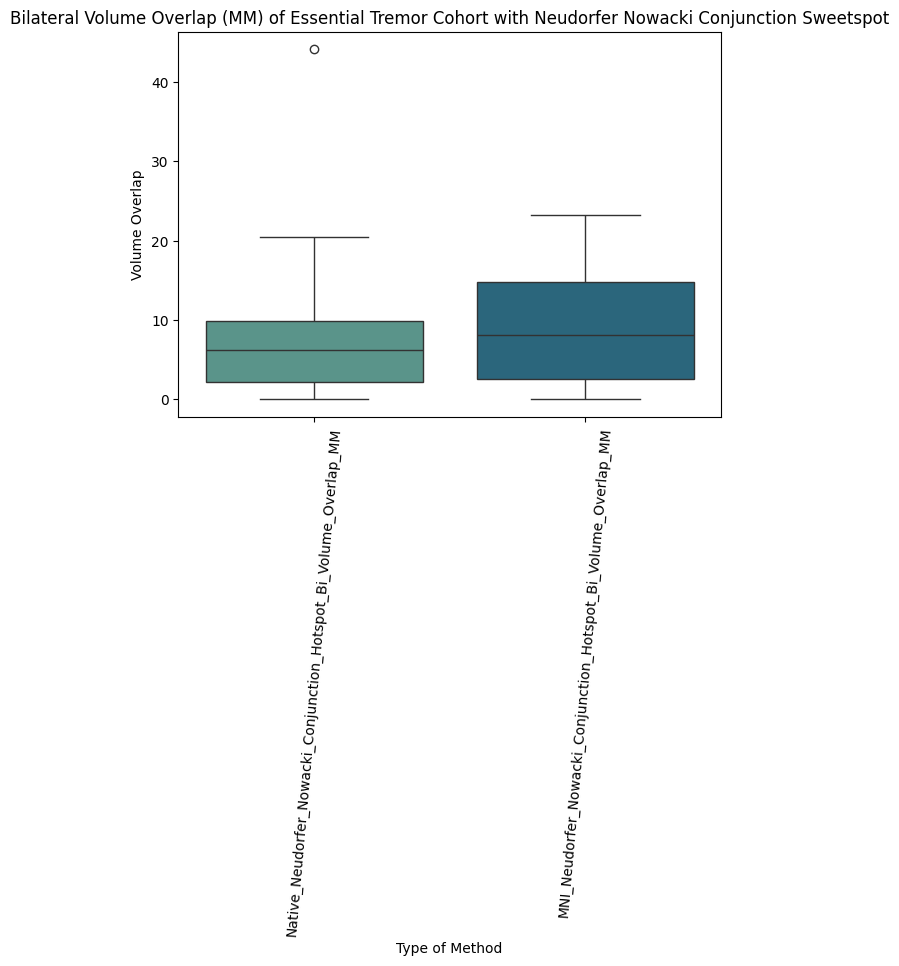

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


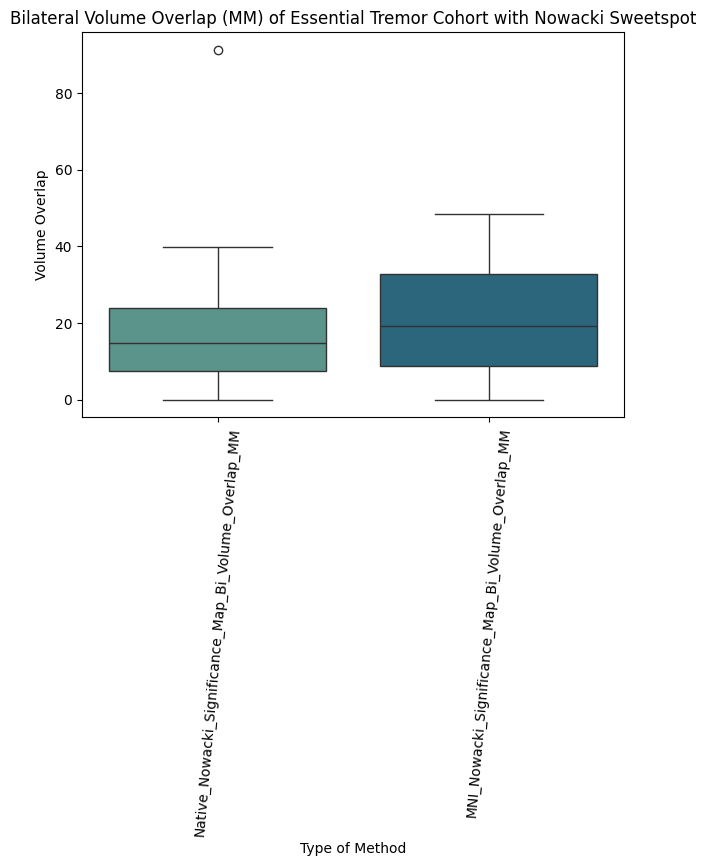

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_58713/3274475521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


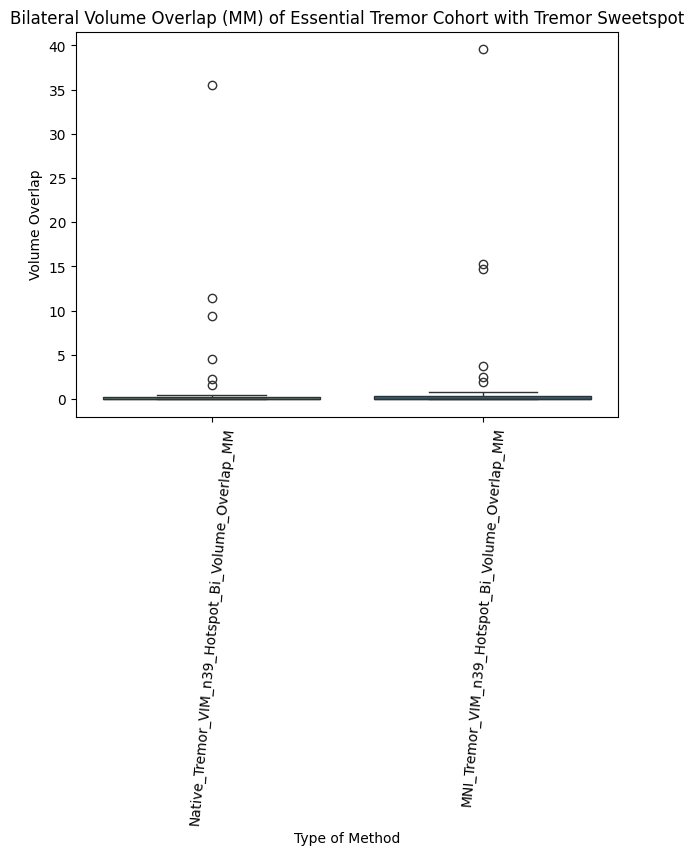

In [2]:
def plot_overlap(columns_to_include,title):
    df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Essential_Tremor_Overlap.csv')
    selected_df = df[columns_to_include]
    melted_df = selected_df.melt(var_name='Column', value_name='Value')

    plt.figure(figsize=(7, 5))
    ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')
    ax.set(xlabel = 'Type of Method',ylabel='Volume Overlap',title=title)
    ax.tick_params(axis='x', rotation=85)
    plt.show()
    
plot_overlap((['Native_VIM_Distal_Bi_Volume_Overlap_MM', 'MNI_VIM_Distal_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with VIM')
plot_overlap((['Native_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM','MNI_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with VLdVLv')
plot_overlap((['Native_VLpv_Morel_Bi_Volume_Overlap_MM','MNI_VLpv_Morel_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with VLpv')

plot_overlap((['Native_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM','MNI_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with Dembek DRTT Sweetspot')
plot_overlap((['Native_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM','MNI_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with Neudorfer Hypointensity Sweetspot')
plot_overlap((['Native_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM','MNI_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with Neudorfer Nowacki Conjunction Sweetspot')
plot_overlap((['Native_Nowacki_Significance_Map_Bi_Volume_Overlap_MM','MNI_Nowacki_Significance_Map_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with Nowacki Sweetspot')
plot_overlap((['Native_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM','MNI_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM']),'Bilateral Volume Overlap (MM) of Essential Tremor Cohort with Tremor Sweetspot')

In [32]:
#get r and p values for overlaps
def r_p(vol_overlap_col):
    df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Essential_Tremor_Overlap.csv')
    pearson_r, pearson_p = pearsonr(df['TRS_Perc_Improvement'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df['TRS_Perc_Improvement'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

native_vim_pearson_r,native_vim_pearson_p,native_vim_spearman_r,native_vim_spearman_p = r_p('Native_VIM_Distal_Bi_Volume_Overlap_MM')
mni_vim_pearson_r,mni_vim_pearson_p,mni_vim_spearman_r,mni_vim_spearman_p = r_p('MNI_VIM_Distal_Bi_Volume_Overlap_MM')

native_vldvlv_pearson_r,native_vldvlv_pearson_p,native_vldvlv_spearman_r,native_vldvlv_spearman_p = r_p('Native_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM')
mni_vldvlv_pearson_r,mni_vldvlv_pearson_p,mni_vldvlv_spearman_r,mni_vldvlv_spearman_p = r_p('MNI_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM')

native_vlpv_pearson_r,native_vlpv_pearson_p,native_vlpv_spearman_r,native_vlpv_spearman_p = r_p('Native_VLpv_Morel_Bi_Volume_Overlap_MM')
mni_vlpv_pearson_r,mni_vlpv_pearson_p,mni_vlpv_spearman_r,mni_vlpv_spearman_p = r_p('MNI_VLpv_Morel_Bi_Volume_Overlap_MM')

native_till_pearson_r,native_till_pearson_p,native_till_spearman_r,native_till_spearman_p = r_p('Native_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM')
mni_till_pearson_r,mni_till_pearson_p,mni_till_spearman_r,mni_till_spearman_p = r_p('MNI_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM')

native_hypo_pearson_r,native_hypo_pearson_p,native_hypo_spearman_r,native_hypo_spearman_p = r_p('Native_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM')
mni_hypo_pearson_r,mni_hypo_pearson_p,mni_hypo_spearman_r,mni_hypo_spearman_p = r_p('MNI_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM')

native_conj_pearson_r,native_conj_pearson_p,native_conj_spearman_r,native_conj_spearman_p = r_p('Native_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM')
mni_conj_pearson_r,mni_conj_pearson_p,mni_conj_spearman_r,mni_conj_spearman_p = r_p('MNI_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM')

native_sig_pearson_r,native_sig_pearson_p,native_sig_spearman_r,native_sig_spearman_p = r_p('Native_Nowacki_Significance_Map_Bi_Volume_Overlap_MM')
mni_sig_pearson_r,mni_sig_pearson_p,mni_sig_spearman_r,mni_sig_spearman_p = r_p('MNI_Nowacki_Significance_Map_Bi_Volume_Overlap_MM')

native_n39_pearson_r,native_n39_pearson_p,native_n39_spearman_r,native_n39_spearman_p = r_p('Native_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM')
mni_n39_pearson_r,mni_n39_pearson_p,mni_n39_spearman_r,mni_n39_spearman_p = r_p('MNI_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM')

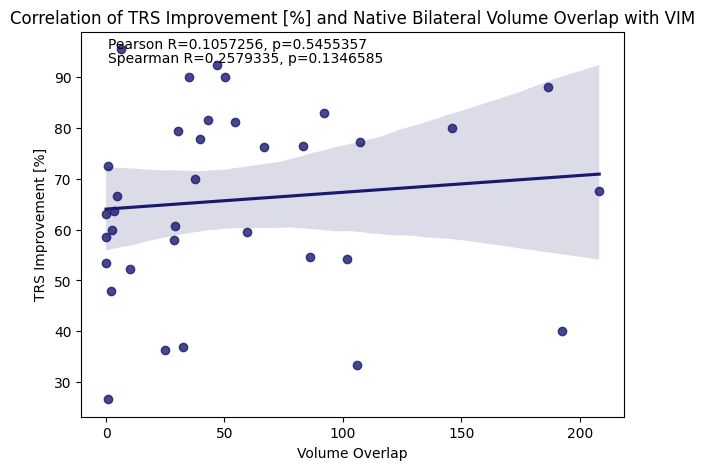

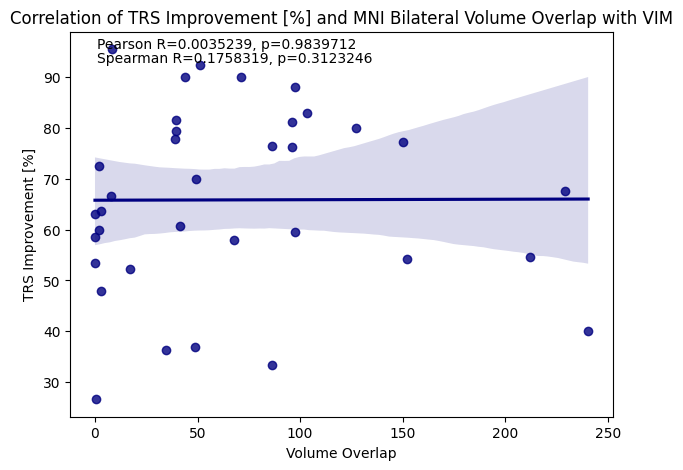

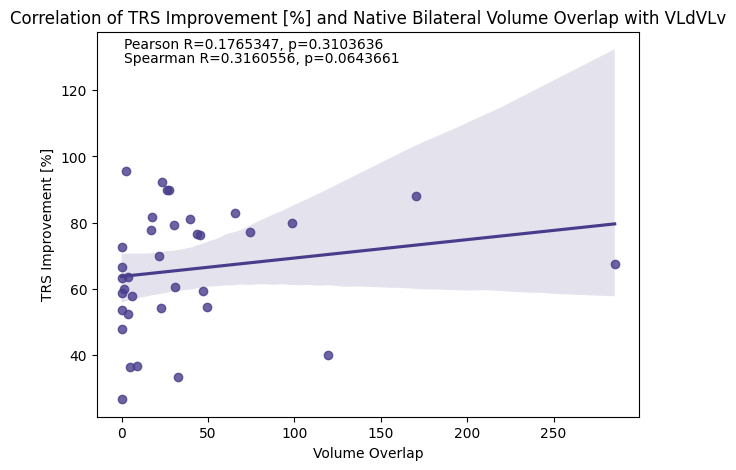

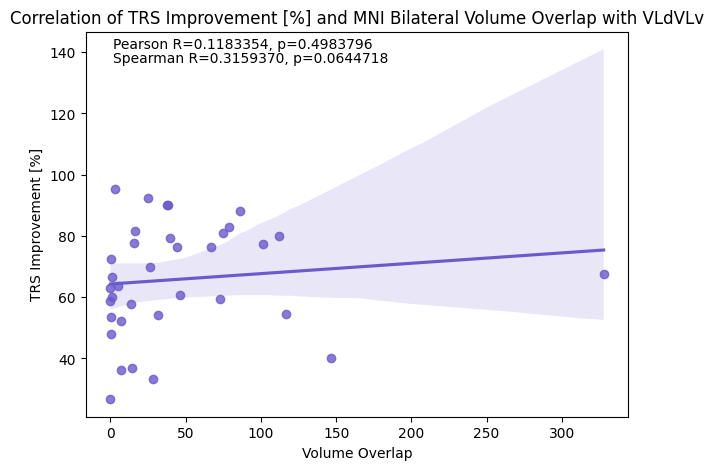

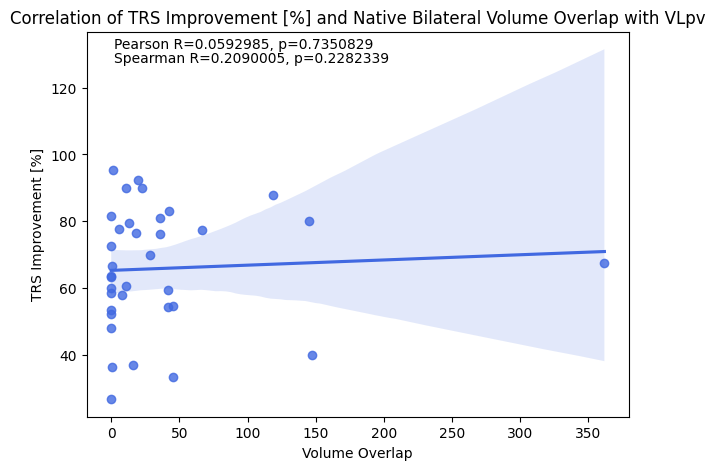

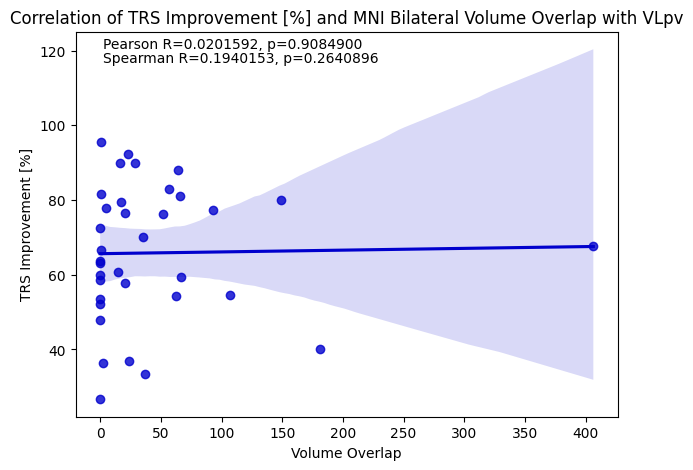

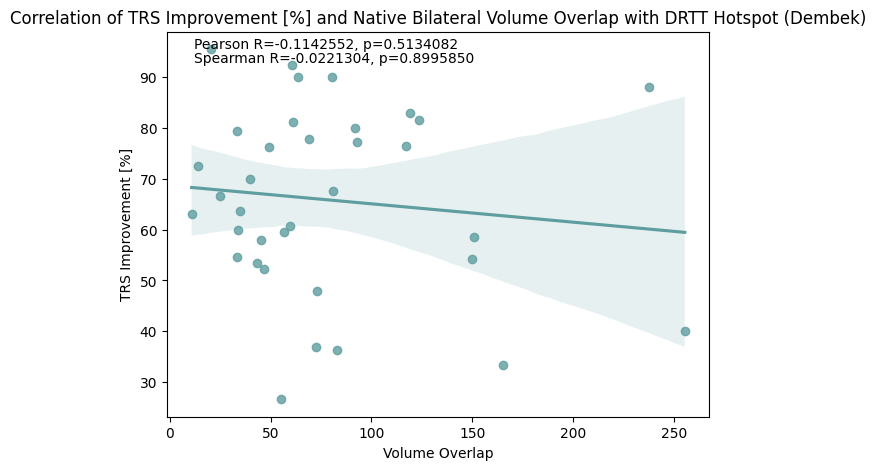

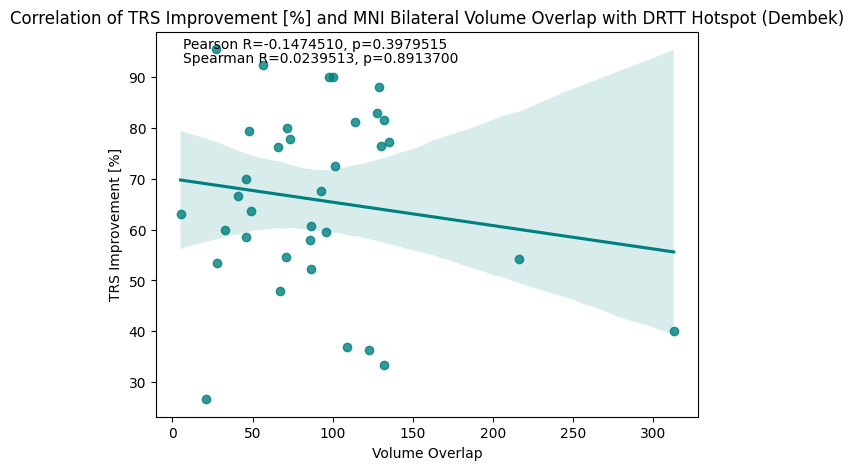

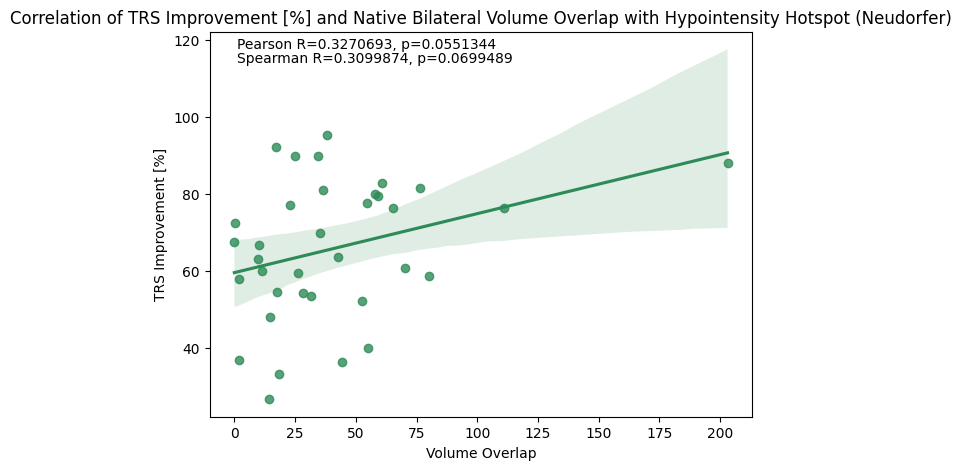

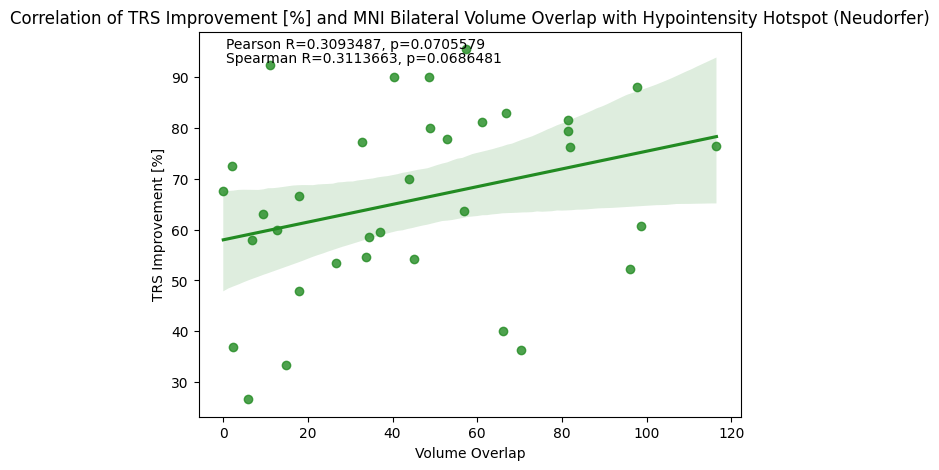

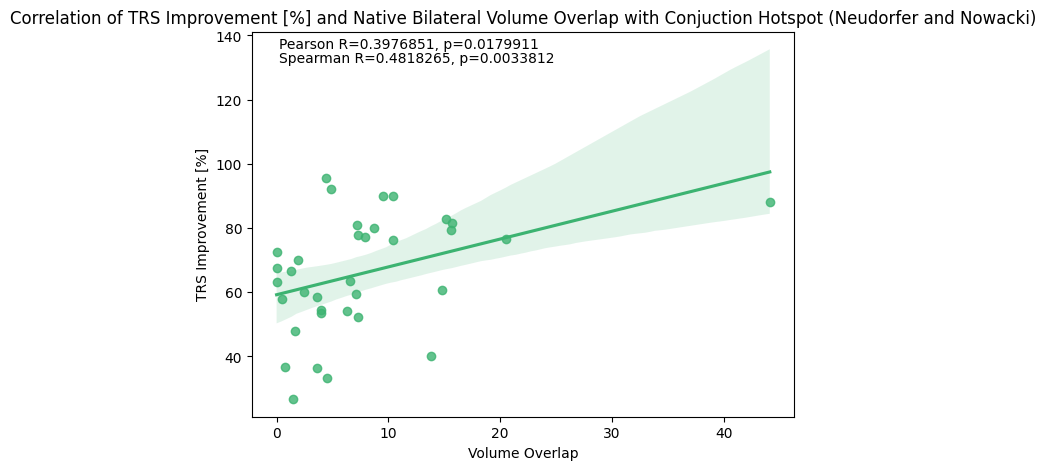

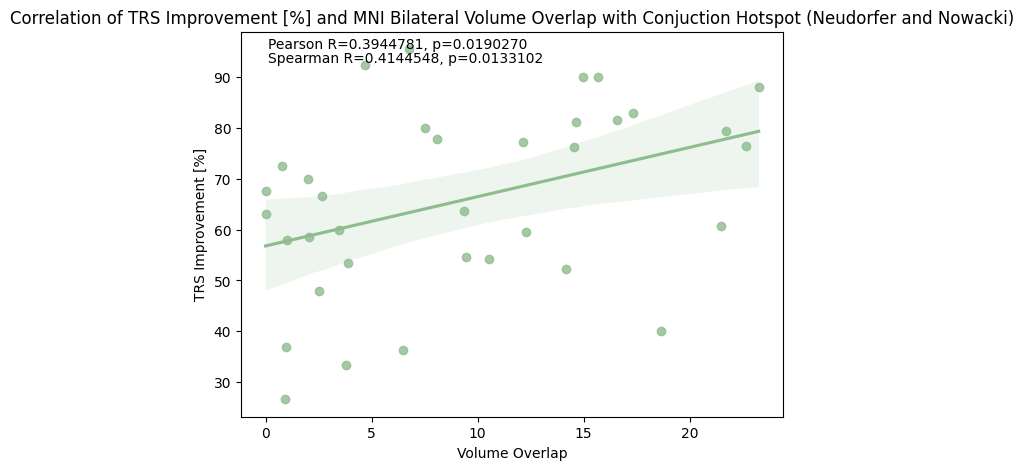

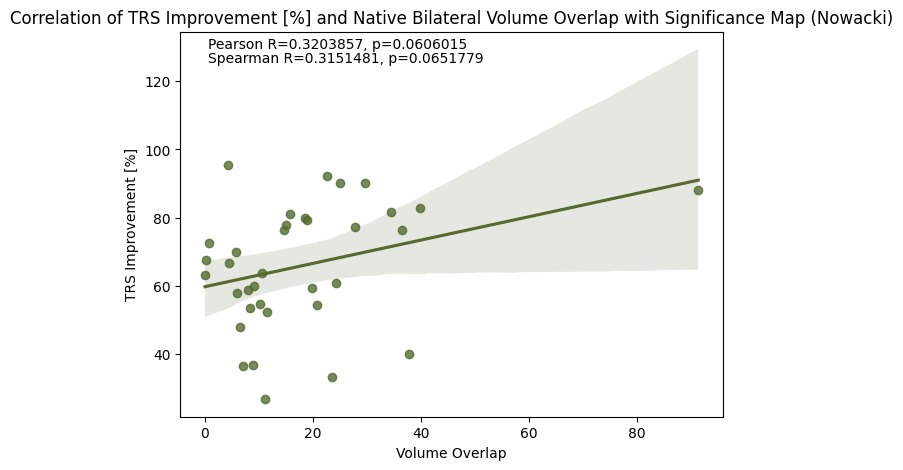

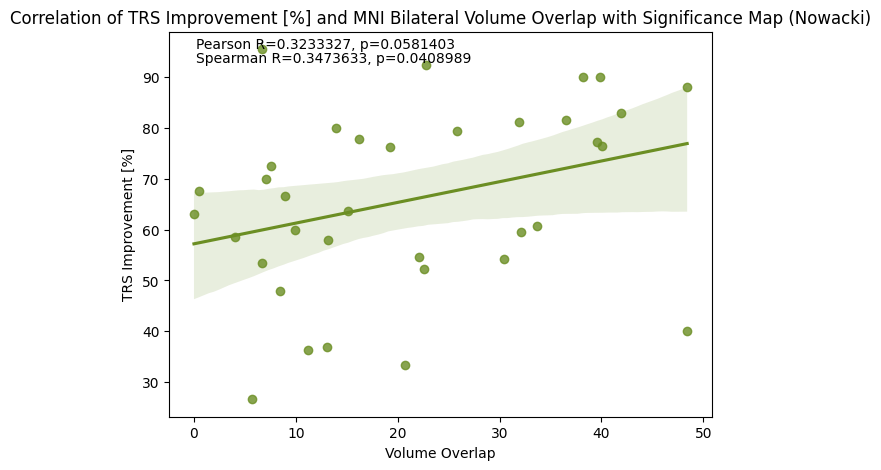

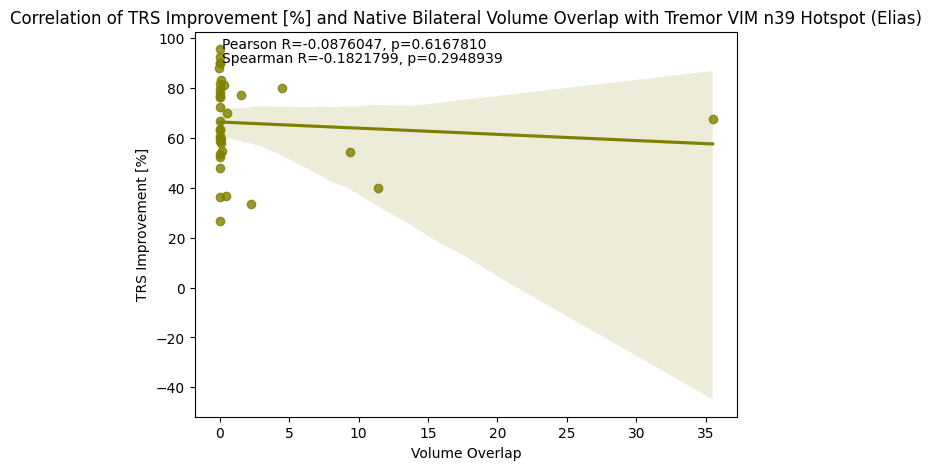

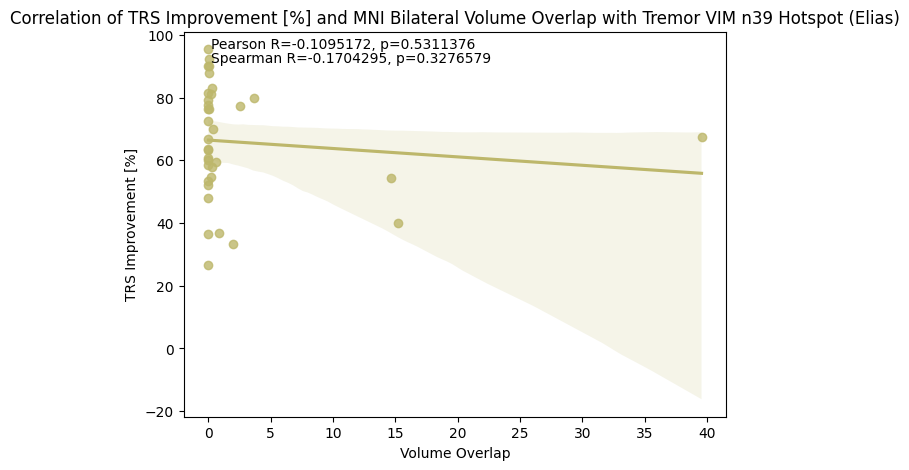

In [33]:
#correlation plots
def plot_analysis(x_data, title, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df['TRS_Perc_Improvement'], color=color)
    plt.title(title)
    plt.xlabel('Volume Overlap')
    plt.ylabel('TRS Improvement [%]')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),
            transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),
            transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()

df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Essential_Tremor_Overlap.csv')
plot_analysis(df['Native_VIM_Distal_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with VIM',native_vim_pearson_r,native_vim_pearson_p,native_vim_spearman_r,native_vim_spearman_p,'midnightblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with VIM.png')
plot_analysis(df['MNI_VIM_Distal_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with VIM',mni_vim_pearson_r,mni_vim_pearson_p,mni_vim_spearman_r,mni_vim_spearman_p,'navy','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with VIM.png')

plot_analysis(df['Native_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with VLdVLv',native_vldvlv_pearson_r,native_vldvlv_pearson_p,native_vldvlv_spearman_r,native_vldvlv_spearman_p,'darkslateblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with VLdVLv.png')
plot_analysis(df['MNI_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with VLdVLv',mni_vldvlv_pearson_r,mni_vldvlv_pearson_p,mni_vldvlv_spearman_r,mni_vldvlv_spearman_p,'slateblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with VLdVLv.png')

plot_analysis(df['Native_VLpv_Morel_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with VLpv',native_vlpv_pearson_r,native_vlpv_pearson_p,native_vlpv_spearman_r,native_vlpv_spearman_p,'royalblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with VLpv.png')
plot_analysis(df['MNI_VLpv_Morel_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with VLpv',mni_vlpv_pearson_r,mni_vlpv_pearson_p,mni_vlpv_spearman_r,mni_vlpv_spearman_p,'mediumblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with VLpv.png')

plot_analysis(df['Native_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with DRTT Hotspot (Dembek)',native_till_pearson_r,native_till_pearson_p,native_till_spearman_r,native_till_spearman_p,'cadetblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with DRTT Hotspot (Dembek).png')
plot_analysis(df['MNI_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with DRTT Hotspot (Dembek)',mni_till_pearson_r,mni_till_pearson_p,mni_till_spearman_r,mni_till_spearman_p,'teal','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with DRTT Hotspot (Dembek).png')

plot_analysis(df['Native_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with Hypointensity Hotspot (Neudorfer)',native_hypo_pearson_r,native_hypo_pearson_p,native_hypo_spearman_r,native_hypo_spearman_p,'seagreen','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with Hypointensity Hotspot (Neudorfer).png')
plot_analysis(df['MNI_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with Hypointensity Hotspot (Neudorfer)',mni_hypo_pearson_r,mni_hypo_pearson_p,mni_hypo_spearman_r,mni_hypo_spearman_p,'forestgreen','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with Hypointensity Hotspot (Neudorfer).png')

plot_analysis(df['Native_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with Conjuction Hotspot (Neudorfer and Nowacki)',native_conj_pearson_r,native_conj_pearson_p,native_conj_spearman_r,native_conj_spearman_p,'mediumseagreen','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with Conjunction Hotspot (Neudorfer and Nowacki).png')
plot_analysis(df['MNI_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with Conjuction Hotspot (Neudorfer and Nowacki)',mni_conj_pearson_r,mni_conj_pearson_p,mni_conj_spearman_r,mni_conj_spearman_p,'darkseagreen','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with Conjunction Hotspot (Neudorfer and Nowacki).png')

plot_analysis(df['Native_Nowacki_Significance_Map_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with Significance Map (Nowacki)',native_sig_pearson_r,native_sig_pearson_p,native_sig_spearman_r,native_sig_spearman_p,'darkolivegreen','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with Significance Map (Nowacki).png')
plot_analysis(df['MNI_Nowacki_Significance_Map_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with Significance Map (Nowacki)',mni_sig_pearson_r,mni_sig_pearson_p,mni_sig_spearman_r,mni_sig_spearman_p,'olivedrab','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with Significance Map (Nowacki).png')

plot_analysis(df['Native_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and Native Bilateral Volume Overlap with Tremor VIM n39 Hotspot (Elias)',native_n39_pearson_r,native_n39_pearson_p,native_n39_spearman_r,native_n39_spearman_p,'olive','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native Bilateral Volume Overlap with Tremor VIM n39 Hotspot (Elias).png')
plot_analysis(df['MNI_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of TRS Improvement [%] and MNI Bilateral Volume Overlap with Tremor VIM n39 Hotspot (Elias)',mni_n39_pearson_r,mni_n39_pearson_p,mni_n39_spearman_r,mni_n39_spearman_p,'darkkhaki','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/MNI Bilateral Volume Overlap with Tremor VIM n39 Hotspot (Elias).png')

In [34]:
#correlation of different method overlaps (native vs mni)
#get r and p values
def r_p(native,mni):
    df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Essential_Tremor_Overlap.csv')
    pearson_r, pearson_p = pearsonr(df[native],df[mni])
    spearman_r, spearman_p = spearmanr(df[native],df[mni])
    return pearson_r, pearson_p, spearman_r, spearman_p

vim_pearson_r,vim_pearson_p,vim_spearman_r,vim_spearman_p = r_p('Native_VIM_Distal_Bi_Volume_Overlap_MM','MNI_VIM_Distal_Bi_Volume_Overlap_MM')
vldvlv_pearson_r,vldvlv_pearson_p,vldvlv_spearman_r,vldvlv_spearman_p = r_p('Native_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM','MNI_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM')
vlpv_pearson_r,vlpv_pearson_p,vlpv_spearman_r,vlpv_spearman_p = r_p('Native_VLpv_Morel_Bi_Volume_Overlap_MM','MNI_VLpv_Morel_Bi_Volume_Overlap_MM')
till_pearson_r,till_pearson_p,till_spearman_r,till_spearman_p = r_p('Native_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM','MNI_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM')
hypo_pearson_r,hypo_pearson_p,hypo_spearman_r,hypo_spearman_p = r_p('Native_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM','MNI_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM')
conj_pearson_r,conj_pearson_p,conj_spearman_r,conj_spearman_p = r_p('Native_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM','MNI_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM')
sig_pearson_r,sig_pearson_p,sig_spearman_r,sig_spearman_p = r_p('Native_Nowacki_Significance_Map_Bi_Volume_Overlap_MM','MNI_Nowacki_Significance_Map_Bi_Volume_Overlap_MM')
n39_pearson_r,n39_pearson_p,n39_spearman_r,n39_spearman_p = r_p('Native_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM','MNI_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM')

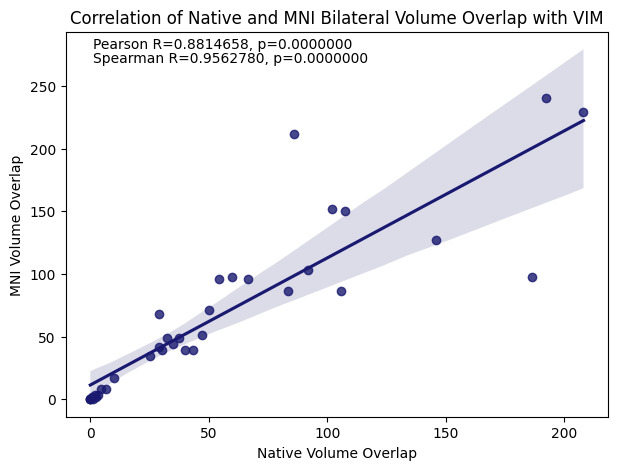

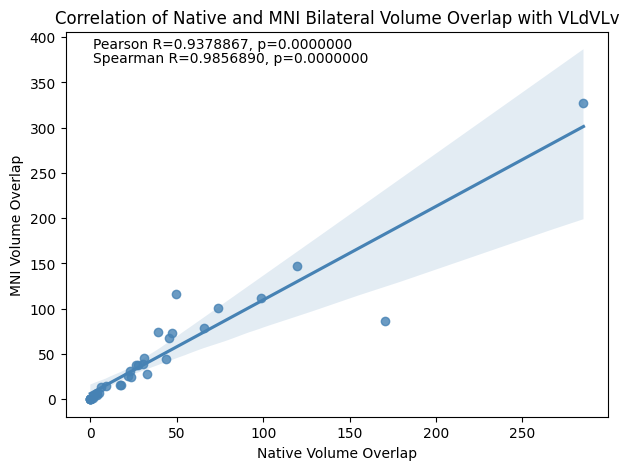

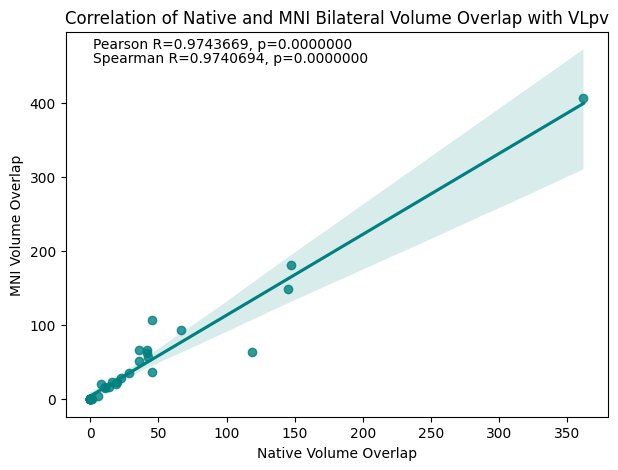

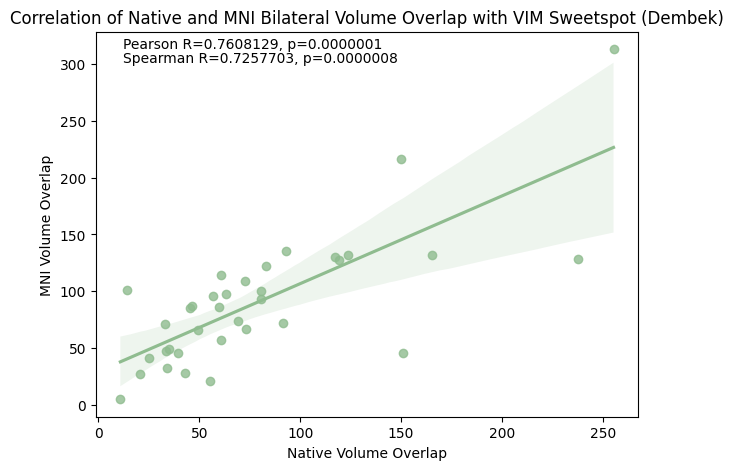

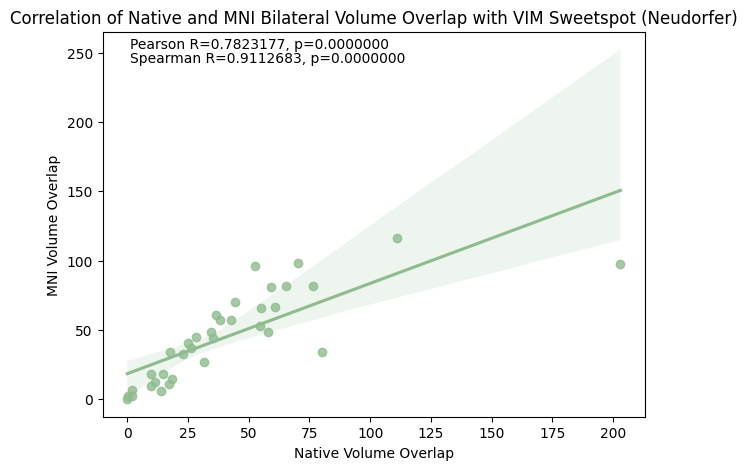

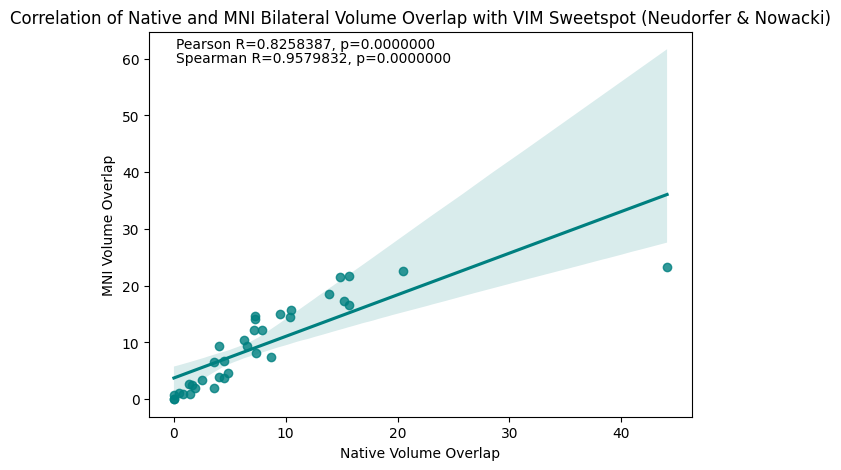

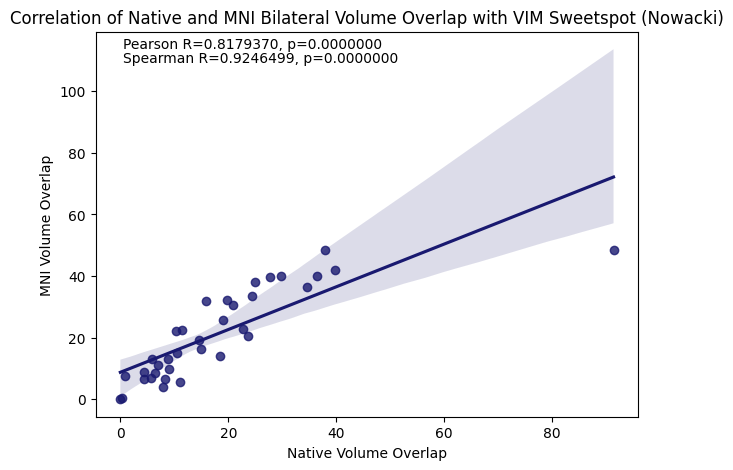

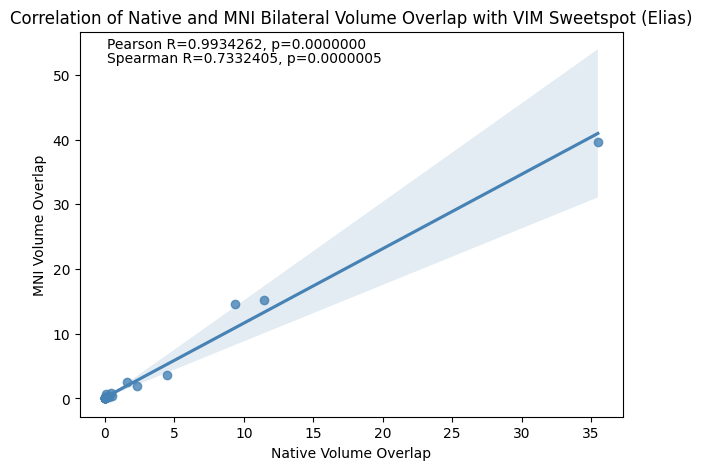

In [35]:
#correlation plots
def plot_analysis(x_data, y_data, title, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=y_data, color=color)
    plt.title(title)
    plt.xlabel('Native Volume Overlap')
    plt.ylabel('MNI Volume Overlap')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),
            transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),
            transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()

df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Essential_Tremor_Overlap.csv')
plot_analysis(df['Native_VIM_Distal_Bi_Volume_Overlap_MM'],df['MNI_VIM_Distal_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VIM',vim_pearson_r,vim_pearson_p,vim_spearman_r,vim_spearman_p,'midnightblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VIM Correlation.png')
plot_analysis(df['Native_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM'],df['MNI_VLdVLv_Ilinsky_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VLdVLv',vldvlv_pearson_r,vldvlv_pearson_p,vldvlv_spearman_r,vldvlv_spearman_p,'steelblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VLdVLv Correlation.png')
plot_analysis(df['Native_VLpv_Morel_Bi_Volume_Overlap_MM'],df['MNI_VLpv_Morel_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VLpv',vlpv_pearson_r,vlpv_pearson_p,vlpv_spearman_r,vlpv_spearman_p,'teal','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VLpv Correlation.png')

plot_analysis(df['Native_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM'],df['MNI_Dembek_DRTT_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Dembek)',till_pearson_r,till_pearson_p,till_spearman_r,till_spearman_p,'darkseagreen','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Dembek) Correlation.png')
plot_analysis(df['Native_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM'],df['MNI_Neudorfer_Hypointensity_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Neudorfer)',hypo_pearson_r,hypo_pearson_p,hypo_spearman_r,hypo_spearman_p,'darkseagreen','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Neudorfer) Correlation.png')
plot_analysis(df['Native_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM'],df['MNI_Neudorfer_Nowacki_Conjunction_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Neudorfer & Nowacki)',conj_pearson_r,conj_pearson_p,conj_spearman_r,conj_spearman_p,'teal','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Neudorfer & Nowacki) Correlation.png')

plot_analysis(df['Native_Nowacki_Significance_Map_Bi_Volume_Overlap_MM'],df['MNI_Nowacki_Significance_Map_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Nowacki)',sig_pearson_r,sig_pearson_p,sig_spearman_r,sig_spearman_p,'midnightblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Nowacki) Correlation.png')
plot_analysis(df['Native_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM'],df['MNI_Tremor_VIM_n39_Hotspot_Bi_Volume_Overlap_MM'],'Correlation of Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Elias)',n39_pearson_r,n39_pearson_p,n39_spearman_r,n39_spearman_p,'steelblue','/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/Native and MNI Bilateral Volume Overlap with VIM Sweetspot (Elias) Correlation.png')